In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error


In [2]:
# Load and prepare the dataset
df = pd.read_csv("local_data/Energy_consumption.csv")

# Convert Timestamp and set index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Preview the data
df.head()


,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


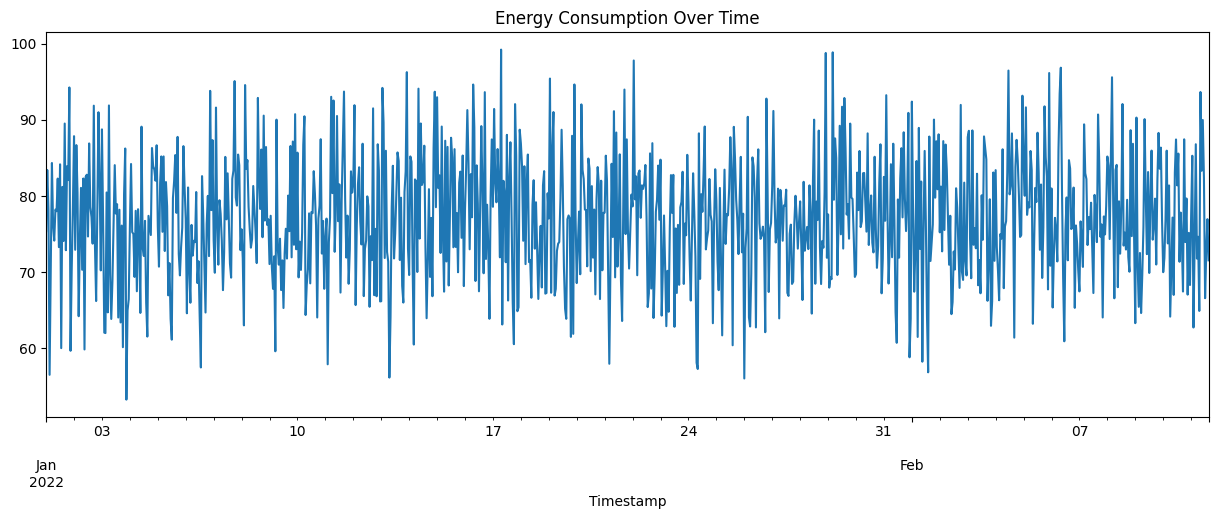

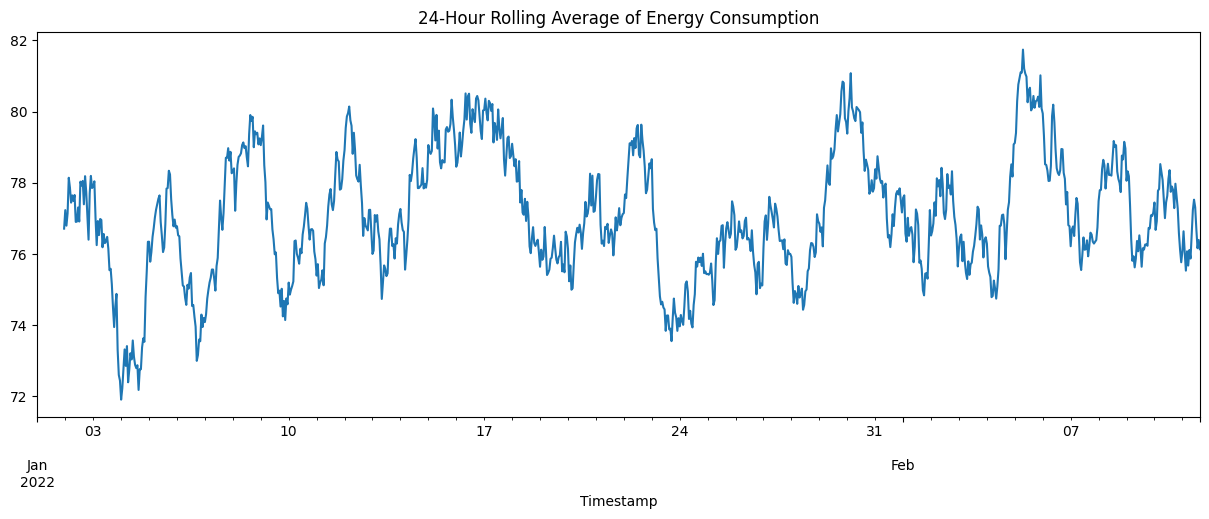

In [3]:
# Plot raw energy consumption over time
df['EnergyConsumption'].plot(figsize=(15,5), title='Energy Consumption Over Time')
plt.show()

# 24-hour rolling average
df['EnergyConsumption'].rolling(window=24).mean().plot(figsize=(15, 5), title='24-Hour Rolling Average of Energy Consumption')
plt.show()


In [4]:
# Train-test split (last 48 hours for testing)
train = df['EnergyConsumption'][:-48]
test = df['EnergyConsumption'][-48:]

# Fit Simple Exponential Smoothing model
model = SimpleExpSmoothing(train).fit()
predictions = model.forecast(48)


C:\Users\arttu\anaconda3\envs\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


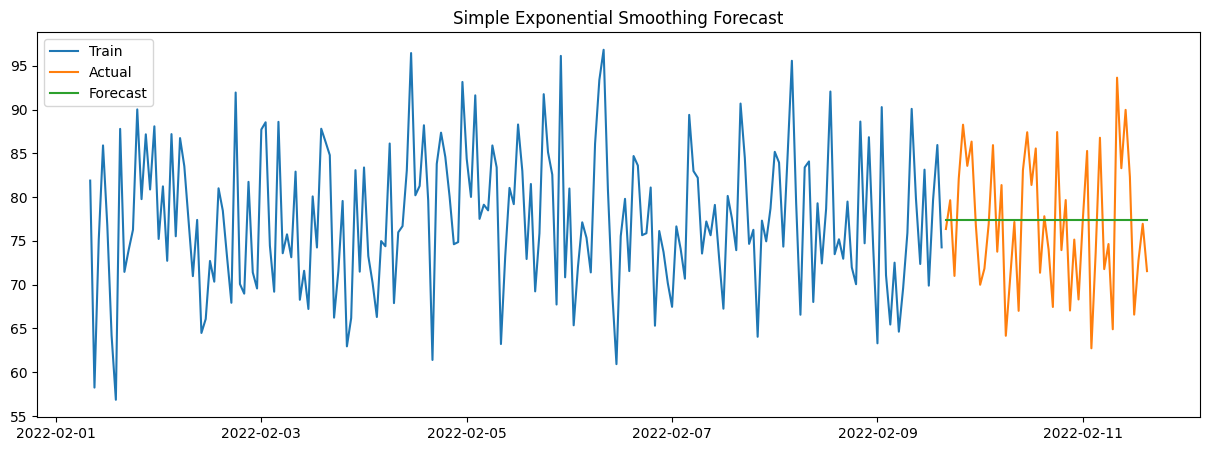

In [5]:
# Plot forecast vs actual
plt.figure(figsize=(15,5))
plt.plot(train.index[-200:], train[-200:], label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Forecast')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()


In [6]:
# Evaluate the forecast
mae = mean_absolute_error(test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 6.34
